# **8. Functions**

## **8.1 Functions for Confidence Intervals and Tests**

Use the help to get complete information. Below, I note two of the simpler functions.

**8.1.1 The t-test and associated confidence interval**

Use t.test(). This allows both a one-sample and a two-sample test.

**8.1.2 Chi-Square tests for two-way tables**

You can use `chisq.test()` to perform a test for independence between rows and columns in a table generated by `table()`. This test checks if there's an association between the variables represented by the rows and columns. However, it's important to note that this test assumes that the counts in the table are independent of each other. If there's any clustering or dependency in the data, this test might not be valid.

## **8.2 Matching and Ordering**


```
 match(<vec1>, <vec2>) ## For each element of <vec1>, returns the
                       ## position of the first occurrence in <vec2>

order(<vector>) ## Returns the vector of subscripts giving
                 ## the order in which elements must be taken
                 ## so that <vector> will be sorted

 rank(<vector>)  ## Returns the ranks of the successive elements.

```

Numeric vectors will be sorted in numerical order. Character vectors will be sorted in alphanumeric order.
The operator %in% can be highly useful in picking out subsets of data. For example:

In [1]:
 x <- rep(1:5,rep(3,5))
 x

[1] 1 1 1 2 2 2 3 3 3 4 4 4 5 5 5

In [2]:
two4 <- x %in% c(2,4)
two4

[1] FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE
[13] FALSE FALSE FALSE

In [3]:
 # Now pick out the 2s and the 4s
 x[two4]

[1] 2 2 2 4 4 4

## **8.3 String Functions**



```
subtring (<vetor of text strings>, first position>, <last position>)
nchar(<vector of text strings>)    ##Return vector of number of characters in each element.

```

**8.3.1 Operations with vectors of Text Strings - A Furthur Example**

we will work with the column type in the datset Car93 from the Mass Package.

```
library(MASS)   #if needed
```

To find the position at which the first space appears in the information on type of car, we might do the following



In [4]:
Cars93 <- read.csv("/content/cars93.csv")
car.brandtype  <- sapply(strsplit(as.character(Cars93$type), " ", fixed = TRUE), function(x)x[1])
car.brandtype[1:3]

[1] "small"   "midsize" "midsize"

## **8.4 Application of a Function to the Columns of an Array or Data Frame**

```
apply(<array>, <dimension>, <function>)
lapply(<list>, <function>)
 ## N. B. A dataframe is a list. Output is a list.
sapply(<list>, <function>)
 ## As lapply(), but simplify (e.g. to a vector
 ## or matrix), if possible.

 ```

**8.4.1 apply()**

The function apply() can be used on data frames as well as matrices .

In [5]:
apply(airquality,2,mean)    # all element must be numeric!

Ozone   Solar.R      Wind      Temp     Month       Day 
       NA        NA  9.957516 77.882353  6.993464 15.803922

In [6]:
apply(airquality,2,mean,na.rm = TRUE)

Ozone    Solar.R       Wind       Temp      Month        Day 
 42.129310 185.931507   9.957516  77.882353   6.993464  15.803922

The use of apply(airquality,1,mean) will give means for each row. These are not, for these data, useful information!

**8.4.2 sapply()**

The sapply() function can be used to apply a function to each column of a data frame. In this case, the function is sum(), and it is being used to count the number of missing values in each column.
This code will print a vector containing the number of missing values in each column of the airquality data frame.

In [7]:
sapply(airquality, function(x)sum(is.na(x)))

Ozone Solar.R    Wind    Temp   Month     Day 
     37       7       0       0       0       0

Here are several further example that use the data frame moths that accompanies these notes:

In [8]:
moths <- read.csv("/content/moths.csv")
sapply(moths,is.factor)  #Determine which columns are factors

rownames   meters        A        P  habitat 
   FALSE    FALSE    FALSE    FALSE    FALSE

In [9]:
# How many levels does each factor have?
sapply(moths, function(x) if(!is.factor(x) ) return(0) else length(levels(x)))

rownames   meters        A        P  habitat 
       0        0        0        0        0

## ***8.5 aggregate() and tapply()**


The aggregate() function takes three arguments:

A variable to be summarized.
A list of factors to group the data by.
A function to apply to each group of data.
The function is applied to each combination of factor levels, and the result is a data frame containing the summarized values for each group.

For example, the following code calculates the mean of the Ozone column for each combination of Month and Day in the airquality data frame:

This will produce a data frame with three columns: Month, Day, and Ozone. The Ozone column will contain the average ozone level for each combination of month and day.

In [10]:
cabbages <- read.csv("/content/cabbages.csv")
str(cabbages)

'data.frame':	60 obs. of  5 variables:
 $ rownames: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Cult    : chr  "c39" "c39" "c39" "c39" ...
 $ Date    : chr  "d16" "d16" "d16" "d16" ...
 $ HeadWt  : num  2.5 2.2 3.1 4.3 2.5 4.3 3.8 4.3 1.7 3.1 ...
 $ VitC    : int  51 55 45 42 53 50 50 52 56 49 ...


In [11]:
attach(cabbages)
aggregate(HeadWt , by = list(Cult, Date = Date), FUN = mean)

Group.1,Date,x
<chr>,<chr>,<dbl>
c39,d16,3.18
c52,d16,2.26
c39,d20,2.80
c52,d20,3.11
c39,d21,2.74
c52,d21,1.47


The tapply() function is similar to the aggregate() function, except that the second argument is named INDEX instead of by. The output of tapply() is an array with as many dimensions as there are factors. If there are no data values for a particular combination of factor levels, the value NA is returned.

For example, the following code calculates the mean of the Ozone column for each level of the Month factor in the airquality data frame:

```
tapply(airquality$Ozone, airquality$Month, mean)
```
This will produce a vector with 12 elements, one for each month. The ith element of the vector will contain the average ozone level for the ith month. If there are any months with no ozone data, the corresponding element of the vector will be NA.

## ***8.6 Merging Data Frames**

The Cars93 data frame (from the MASS package) has a lot of information about 93 cars sold in the USA in 1993. One of the columns in this data frame is called "Type" and it is a factor (a type of data used for categories). I made a new data frame called Cars93.summary. In this new data frame, each row name is a unique car type from the original "Type" column. There's also a column that has two-letter abbreviations for each car type, which can be used for making plots.

In [12]:
Cars93.summary <- summary(Cars93)
Cars93.summary

     type               price          mpg_city     drive_train       
 Length:54          Min.   : 7.40   Min.   :16.00   Length:54         
 Class :character   1st Qu.:10.95   1st Qu.:19.00   Class :character  
 Mode  :character   Median :17.25   Median :21.00   Mode  :character  
                    Mean   :19.99   Mean   :23.31                     
                    3rd Qu.:26.25   3rd Qu.:28.00                     
                    Max.   :61.90   Max.   :46.00                     
   passengers        weight    
 Min.   :4.000   Min.   :1695  
 1st Qu.:5.000   1st Qu.:2452  
 Median :5.000   Median :3198  
 Mean   :5.111   Mean   :3037  
 3rd Qu.:6.000   3rd Qu.:3522  
 Max.   :6.000   Max.   :4105  

We proceed thus to add a column that has the abbreviations to the data frame. Here however our demands are
simple, and we can proceed thus:

```
new.Cars93 <- merge(x=Cars93,y=Cars93.summary[,4,drop=F],
 by.x="Type",by.y="row.names")
```

This creates a data frame that has the abbreviations in the additional column with name “abbrev”.
If there had been rows with missing values of Type, these would have been omitted from the new data frame.
This can be avoided by making sure that Type has NA as one of its levels, in both data frames.

## **8.7 Dates**


Since version 1.9.0, the date package has been superseded by functions for working with dates that are in R
base. See help(Dates), help(as.Date) and help(format.Date) for detailed information.
Use as.Date() to convert text strings into dates. The default is that the year comes first, then the month, and
then the day of the month, thus:



In [13]:
 # Electricity Billing Dates
dd <- as.Date(c("2003/08/24","2003/11/23","2004/02/22","2004/05/23"))
diff(dd)

Time differences in days
[1] 91 91 91

Time differences of 91, 91, 91 days
Use format() to set or change the way that a date is formatted. The following are a selection of the symbols
used:

%d: day, as number

%a: abbreviated weekday name (%A: unabbreviated)

%m: month (00-12)

%b: month abbreviated name (%B: unabbreviated)

%y: final two digits of year (%Y: all four digits)

The default format is "%Y-%m-%d".

The function as.Date() will take a vector of character strings that has an appropriate format, and convert it
into a dates object. By default, dates are stored using January 1 1970 as origin. This becomes apparent when
as.integer() is used to convert a date into an integer value. Here are examples:

In [14]:
as.Date("1/1/1960", format="%d/%m/%Y")

[1] "1960-01-01"

In [15]:
as.Date("1:12:1960",format="%d:%m:%Y")

[1] "1960-12-01"

In [16]:
as.Date("1960-12-1")-as.Date("1960-1-1")

Time difference of 335 days

In [17]:
 as.Date("31/12/1960","%d/%m/%Y")

[1] "1960-12-31"

In [18]:
as.integer(as.Date("1/1/1970","%d/%m/%Y"))

[1] 0

In [19]:
 as.integer(as.Date("1/1/2000","%d/%m/%Y"))

[1] 10957

In [20]:
# The function format() allows control of the formatting of dates. See help(format.Date).
dec1 <- as.Date("2004-12-1")
format(dec1, format="%b %d %Y")

[1] "Dec 01 2004"

In [21]:
format(dec1, format="%a %b %d %Y")

[1] "Wed Dec 01 2004"

## **8.8. Writing Functions and other Code**

We have already met several functions. Here is a function to convert Fahrenheit to Celsius:


In [22]:
fahrenheit2celsius <- function(fahrenheit=32:40)(fahrenheit-32)*5/9
# Now invoke the function
fahrenheit2celsius(c(40,50,60))

[1]  4.444444 10.000000 15.555556

The function returns the value (fahrenheit-32)*5/9. More generally, a function returns the value of the
last statement of the function. Unless the result from the function is assigned to a name, the result is printed.
Here is a function that prints out the mean and standard deviation of a set of numbers:

In [24]:
mean.and.sd <- function(x = 1:10) {
  av <- mean(x)
  sd <- sqrt(var(x))
  return(c(mean = av, SD = sd))
}

# Now invoke the function
mean.and.sd()
mean.and.sd(hills$climb)


mean      SD 
5.50000 3.02765

ERROR: Error in eval(expr, envir, enclos): object 'hills' not found


**8.8.1 Syntax and Semantics**

To create a function, you use an assignment. The function's parameters go inside round brackets, and you can set default values for them. For example, `x = 1:10` is a default value, allowing the function to run without specifying a parameter.

After the closing parenthesis, the function body starts. If the function body has more than one statement, it should be enclosed in curly braces `{ }`. The return value of the function is usually the last line in the function body. In the example above, the function returns a vector with two named elements: `mean` and `sd`.

**8.8.2 A Function that gives Data Frame Details**

First, we'll define a function that takes a vector `x` as its only argument. This function will check if `x` is a factor and, if so, how many levels it has. The built-in function `is.factor()` returns `TRUE` if `x` is a factor and `FALSE` otherwise. The `faclev()` function uses `is.factor()` to test `x`. If `x` is not a factor, it prints 0; otherwise, it prints the number of levels in `x`.

In [25]:
 faclev <- function(x)if(!is.factor(x))return(0) else
 length(levels(x))
 faclev

function(x)if(!is.factor(x))return(0) else
 length(levels(x))

Earlier, we encountered the function sapply() that can be used to repeat a calculation on all columns of a
data frame. [More generally, the first argument of sapply() may be a list.] To apply faclev() to all
columns of the data frame moths we can specify

In [26]:
 sapply(moths, faclev)

rownames   meters        A        P  habitat 
       0        0        0        0        0

We can alternatively give the definition of faclev directly as the second argument of sapply, thus

In [27]:
sapply(moths, function(x)if(!is.factor(x))return(0)
else length(levels(x)))

rownames   meters        A        P  habitat 
       0        0        0        0        0

Finally, we may want to do similar calculations on a number of different data frames. So we create a function
check.df() that encapsulates the calculations. Here is the definition of check.df().

In [28]:
check.df <- function(df=moths)
 sapply(df, function(x)if(!is.factor(x))return(0) else
 length(levels(x)))

**8.8.3 Compare Working Directory Data Sets with a Reference Set**

At the beginning of a new session, we might store the names of the objects in the working directory in the
vector dsetnames, thus:

Now suppose that we have a function additions(), defined thus:


In [29]:
dsetnames <- objects()
additions <- function(objnames = dsetnames)
{
 newnames <- objects(pos=1)
 existing <- as.logical(match(newnames, objnames, nomatch = 0))
 newnames[!existing]
}

At some later point in the session, we can enter
to get the names of objects that have been added since the start of the session

In [30]:
additions(dsetnames)

[1] "additions" "dsetnames"

**8.8.4 Issues for the Writing and Use of Functions**

Choose meaningful names for your functions and arguments, even if they end up being a bit long. Good names help make your code clear and self-explanatory. In R, use names instead of numbers for vector and list elements, and for rows and columns in arrays and dataframes. For example, `dead.tot[,"dead"]` is clearer and safer than `dead.tot[,2]`.

Set default values for parameters that might need to change later. Group related parameters together using lists. When appropriate, provide a demo mode in your functions to print summary information about the data or results. This not only shows what the function does but can also help with debugging.

Break functions into smaller sub-functions or "primitives" and reuse existing functions whenever possible. Create new primitives in a way that they can be reused too. This ensures that your functions are built from well-tested and well-understood components. Follow the r-help mailing list for useful routines.

Give parameters sensible defaults, especially those that can help demonstrate the function. Use `NULL` as a default when a parameter is mostly optional but can be of various data types. Use `if(!is.null())` to check if you need to handle that parameter further.

Write your code so that it's easy to follow and retrace steps. Incorporate substantial code chunks into functions as soon as possible to keep things organized. Avoid asking for the same information multiple times in your code.

**8.8.5 Functions as aids to Data Management**


When you need to combine data and labels from different sources, and especially if you might need to revisit your work later, organize your data with the same care as your code. For example, if your data files follow a specific pattern, name the files in a way that reflects this pattern. You can then automatically generate these file names using functions like `paste()`.

Use lists to group all the data and labels you need for a set of computations. Give the list a unique and meaningful name. Decide whether to include objects directly in the list or refer to them by name. You can use `switch()` with an identification code to select specific data or information needed for a task.

Create a single function to gather data and labels from different files and possibly perform some initial processing. This makes your code more structured and the function can serve as documentation for your data.

You can also use custom attributes in data frames to document your data. For instance, if you have a data frame called `elasticband` that records how much a rubber band stretches and the resulting distance, you might add a title attribute like this:


In [33]:
# Creating the elasticband dataset
elasticband <- data.frame(
  stretch = c(10, 15, 20, 25, 30, 35, 40, 45, 50, 55),  # amount of stretch
  distance = c(50, 55, 60, 65, 70, 75, 80, 85, 90, 95)  # resulting distance
)

# Adding an attribute to document the dataset
attributes(elasticband)$title <- "Extent of stretch of band, and Resulting Distance"

# Printing the dataset and its title attribute
print(elasticband)
print(attributes(elasticband)$title)


   stretch distance
1       10       50
2       15       55
3       20       60
4       25       65
5       30       70
6       35       75
7       40       80
8       45       85
9       50       90
10      55       95
[1] "Extent of stretch of band, and Resulting Distance"


**8.8.6 Graphs**

Use graphs freely to shed light both on computations and on data. One of R’s big pluses is its tight integration
of computation and graphics

**8.8.7 A Simulation Example**

Imagine a student taking a test with 100 questions, where each question has five possible answers. If the student were to guess randomly on each question, we want to see how many questions they might answer correctly. We can use a computer simulation to get an idea of this.

Here's how the simulation works:
- Each question is treated like flipping a fair coin.
- The student has a 20% chance (or 1 in 5) of guessing the correct answer purely by chance.
- To simulate this guessing process using a computer, we generate a random number for each question. This number comes from a uniform distribution, meaning it's equally likely to be any number between 0 and 1.
- If the random number is less than 0.2 (which is 20%), we count it as a correct guess. If it's 0.2 or greater, we count it as an incorrect guess.

In R, we can write code to simulate this scenario:

In [34]:
# Simulate a student guessing on a multiple-choice test
num_questions <- 100  # Number of questions
prob_correct_guess <- 0.2  # Probability of guessing correctly

# Generate 100 random numbers from a uniform distribution (0,1)
guesses <- runif(num_questions)

# Convert guesses into correct (1) or incorrect (0) answers
correct_answers <- 1 * (guesses < prob_correct_guess)

# Print the results
correct_answers

[1] 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 [75] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1

### Explanation:
1. **Simulation Setup**:
   - `num_questions` is set to 100, representing the 100 questions on the test.
   - `prob_correct_guess` is 0.2, indicating the 20% chance of guessing correctly on each question.

2. **Generating Random Numbers**:
   - `runif(num_questions)` generates 100 random numbers between 0 and 1.

3. **Determining Correct Answers**:
   - We create `correct_answers` by checking if each random number in `guesses` is less than `prob_correct_guess`.
   - The expression `(guesses < prob_correct_guess)` results in a vector of `TRUE` (1) or `FALSE` (0) values. Multiplying by 1 converts `TRUE` to 1 and `FALSE` to 0.

4. **Output**:
   - `correct_answers` prints a vector showing 1 for each correct guess and 0 for each incorrect guess.

This simulation helps us estimate how well a student might do purely by random guessing on a multiple-choice test. It's a practical way to understand the expected outcomes when exact calculations are challenging.

**8.8.8 Poisson Random Numbers**

Think of the Poisson distribution as a way to model the occurrence of rare events, where each event happens independently of others. For instance, accidents at a specific intersection on any given day are considered rare events because they don't happen frequently. The total number of accidents over a longer period, like a year, often follows a distribution that closely resembles a Poisson distribution.

However, the total number of people injured in accidents is unlikely to follow a Poisson distribution. This is because injuries in accidents are influenced by various factors like severity of accidents, number of people involved, and other variables that can lead to non-random and correlated outcomes.

In R, you can use the `rpois()` function to generate random numbers that follow a Poisson distribution. For example, if accidents at an intersection follow a Poisson distribution with an average rate of 3.7 per year, you can simulate the number of accidents over a 10-year period using `rpois(10, 3.7)`.

This simulation approach allows us to explore and understand how the Poisson distribution can model the occurrence of rare events over different time periods.

## **8.9 Exercises**


1. Use the round function together with runif() to generate 100 random integers between 0 and 99. Now
look up the help for sample(), and use it for the same purpose.


In [35]:
# Using round with runif to generate random integers
random_integers <- round(runif(100) * 99)

# Printing the generated random integers
print(random_integers)


  [1] 63 89 44 60 37 98  1 85 61 86 18 65 20 97 71 92 85 55  4 52 45 15 95 34 22
 [26] 60 26 77  9 38 67 35 49 13 53 61 68 67 22 78  0 92 38 45 41 70 78 52 11 64
 [51] 62 20 60 82 10 68 53 35 27 49 27 41 72 37 90  4 50 75 11 98 76 11 25 64 67
 [76] 80 70 30 80 48 93 58 74 81 85 98 56 82 57 62 77 60 67 40 12  6 26 29 23 66


In [36]:
# Using sample to generate random integers
random_integers_sample <- sample(0:99, 100, replace = TRUE)

# Printing the generated random integers using sample
print(random_integers_sample)


  [1] 49 16 58 62 23 26 83 46 72 66 95 51 17 58 56 59 30 19 37 51 79 79 21  3 73
 [26] 33 43 73 55 77 13 20  8 42  8  6  7 99 41 35 77 35 22 12 55 30 35 89 93 15
 [51] 56  6 64 73 98 89 91 26 35 37 59  6 56 83 72 78 72 68 85 30 44 82 66 36 23
 [76]  2 66  8 20 70 37 85 44 24 62 26 46  4 34 26 42 72 18 91 84 48 12 96 19 29


2. Write a function that will take as its arguments a list of response variables, a list of factors, a data frame, and
a function such as mean or median. It will return a data frame in which each value for each combination of
factor levels is summarised in a single statistic, for example the mean or the median.

In [41]:
summary_by_factors <- function(response_vars, factors, data, summary_fun) {
  require(dplyr)  # Load dplyr for data manipulation

  # Convert factors to a list if not already
  if (!is.list(factors)) {
    factors <- list(factors)
  }

  # Group by all factors
  grouped_data <- data %>%
    group_by(across(all_of(factors)))

  # Summarize response variables using summary_fun
  summarised_data <- summarise_all(grouped_data, summary_fun)

  return(summarised_data)
}


3. Determine the number of days, according to R, between the following dates:
January 1 in the year 1700, and January 1 in the year 1800
January 1 in the year 1998, and January 1 in the year 2000

In [46]:
# Convert dates to Date objects
date1 <- as.Date("1700-01-01")
date2 <- as.Date("1800-01-01")

# Calculate the difference in days
days_between_1700_and_1800 <- as.numeric(difftime(date2, date1, units = "days"))
print(days_between_1700_and_1800)

# Convert dates to Date objects
date3 <- as.Date("1998-01-01")
date4 <- as.Date("2000-01-01")

# Calculate the difference in days
days_between_1998_and_2000 <- as.numeric(difftime(date4, date3, units = "days"))
print(days_between_1998_and_2000)


[1] 36524
[1] 730


4. The supplied data frame milk has columns four and one. Seventeen people rated the sweetness of each of
two samples of a milk product on a continuous scale from 1 to 7, one sample with four units of additive and the
other with one unit of additive. Here is a function that plots, for each patient, the four result against the one
result, but insisting on the same range for the x and y axes.
```R
plot.one <- function(){
 xyrange <- range(milk) # Calculates the range of all values in the data frame
 par(pin=c(6.75, 6.75)) # Set plotting area = 6.75 in. by 6.75 in.
 plot(four, one, data=milk, xlim=xyrange, ylim=xyrange, pch=16)
 abline(0,1) # Line where four = one
}
```
Rewrite this function so that, given the name of a data frame and of any two of its columns, it will plot the
second named column against the first named column, showing also the line y=x.

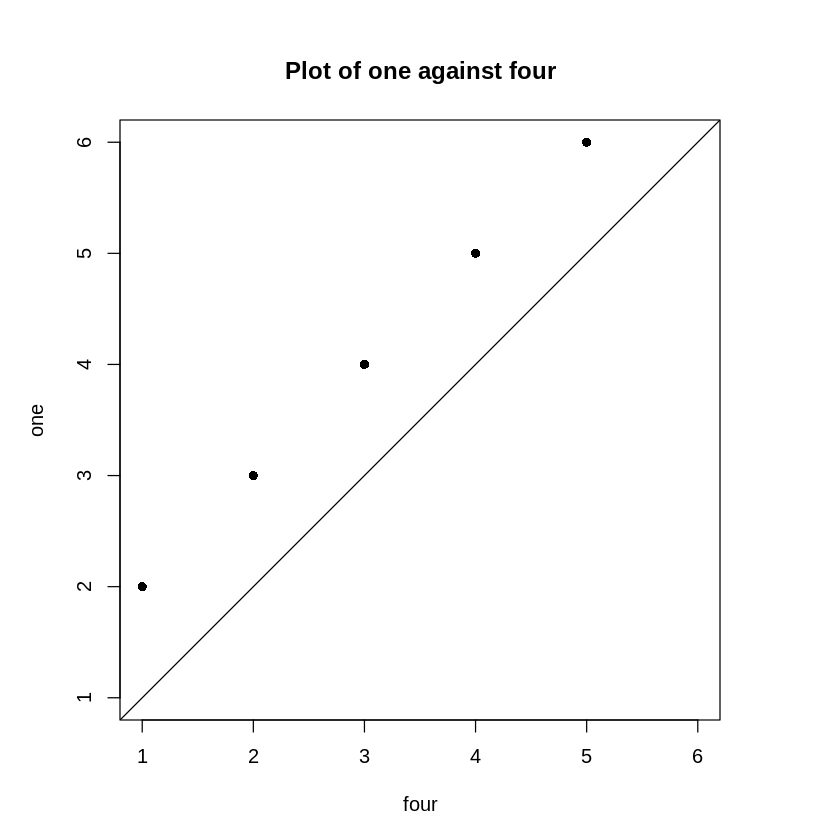

In [53]:
# Example data frame (replace with your actual data)
milk <- data.frame(
  four = c(1, 2, 3, 4, 5),
  one = c(2, 3, 4, 5, 6)
)

# Define the function to plot two columns
plot_two_columns <- function(df_name, col1_name, col2_name) {
  # Extract the columns from the data frame
  col1 <- df_name[[col1_name]]
  col2 <- df_name[[col2_name]]

  # Calculate range for x and y axes
  xyrange <- range(c(col1, col2))

  # Increase plotting area size
  par(pin = c(5, 5))  # Set larger plotting area

  # Set up plot with appropriate labels and limits
  plot(col1, col2, xlim = xyrange, ylim = xyrange, pch = 16,
       xlab = col1_name, ylab = col2_name,
       main = paste("Plot of", col2_name, "against", col1_name))

  # Add y=x line
  abline(0, 1)
}

# Call the function with the example data frame 'milk'
plot_two_columns(milk, "four", "one")


5. Write a function that prints, with their row and column labels, only those elements of a correlation matrix for
which abs(correlation) >= 0.9.

In [54]:
print_high_correlations <- function(cor_matrix) {
  # Get dimensions of the correlation matrix
  n <- nrow(cor_matrix)

  # Iterate through each pair of elements in the upper triangle (excluding diagonal)
  for (i in 1:(n - 1)) {
    for (j in (i + 1):n) {
      # Get correlation coefficient
      corr <- cor_matrix[i, j]

      # Check absolute correlation condition
      if (abs(corr) >= 0.9) {
        # Print row and column labels along with correlation coefficient
        cat("Row:", rownames(cor_matrix)[i], ", Column:", colnames(cor_matrix)[j], ", Correlation:", corr, "\n")
      }
    }
  }
}

# Example usage:
# Assuming you have a correlation matrix `cor_matrix` (replace with your actual matrix)
# Here's a sample correlation matrix:
cor_matrix <- matrix(c(1.0, 0.95, 0.91, 0.95, 1.0, 0.92, 0.91, 0.92, 1.0), nrow = 3,
                     dimnames = list(c("A", "B", "C"), c("A", "B", "C")))

# Print high correlations (absolute value >= 0.9)
print_high_correlations(cor_matrix)


Row: A , Column: B , Correlation: 0.95 
Row: A , Column: C , Correlation: 0.91 
Row: B , Column: C , Correlation: 0.92 


6. Write your own wrapper function for one-way analysis of variance that provides a side by side boxplot of the
distribution of values by groups. If no response variable is specified, the function will generate random normal
data (no difference between groups) and provide the analysis of variance and boxplot information for that.


ANOVA Summary:
            Df Sum Sq Mean Sq F value Pr(>F)
Group        2   0.42  0.2111   0.248  0.781
Residuals   57  48.48  0.8505               


Call:
   aov(formula = as.formula(paste(response_var, "~", group_var)), 
    data = data)

Terms:
                   Group Residuals
Sum of Squares   0.42214  48.47616
Deg. of Freedom        2        57

Residual standard error: 0.9222033
Estimated effects may be unbalanced

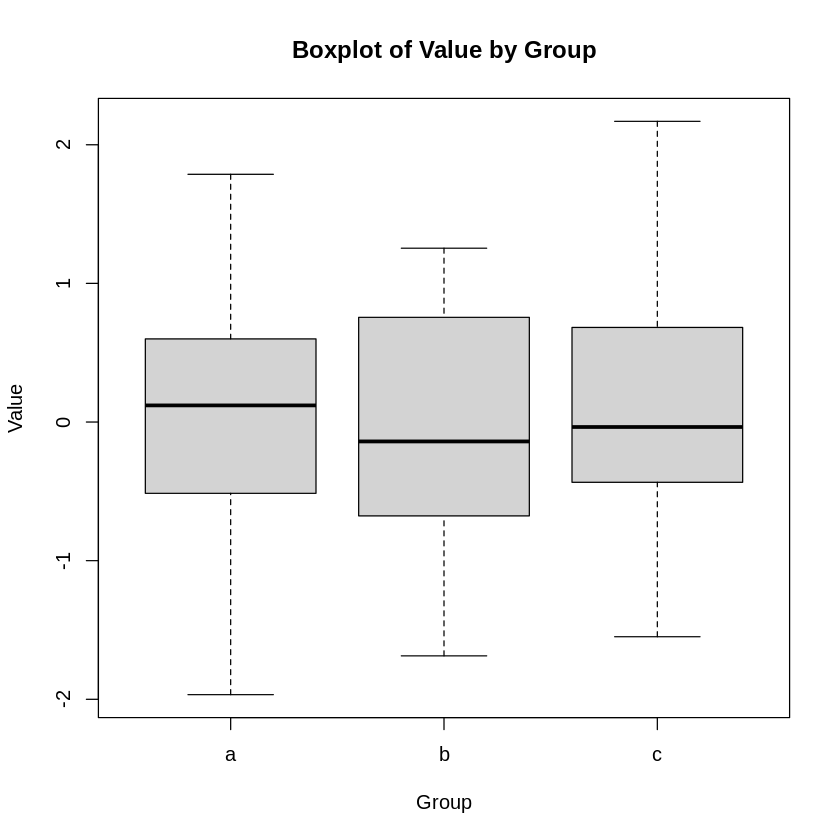

In [55]:
# Wrapper function for one-way ANOVA and side-by-side boxplot
anova_boxplot <- function(data, group_var, response_var = NULL) {
  if (is.null(response_var)) {
    # Generate random normal data if no response variable is specified
    set.seed(123)  # Setting seed for reproducibility
    data <- data.frame(
      Group = factor(rep(letters[1:3], each = 20)),  # Example: 3 groups, 20 observations each
      Value = rnorm(60)  # Random normal data
    )

    response_var <- "Value"  # Assign response variable name
  }

  # Perform ANOVA
  anova_result <- aov(as.formula(paste(response_var, "~", group_var)), data = data)

  # Plot side-by-side boxplot
  boxplot(data[[response_var]] ~ data[[group_var]],
          xlab = group_var, ylab = response_var,
          main = paste("Boxplot of", response_var, "by", group_var))

  # Print ANOVA summary
  cat("\nANOVA Summary:\n")
  print(summary(anova_result))

  # Return ANOVA result for further analysis if needed
  return(anova_result)
}

# Example usage:
# 1. Provide your own data and specify group and response variables
# data <- your_data_frame
# anova_boxplot(data, "Group", "Response")

# 2. Generate random normal data and perform ANOVA with boxplot
anova_boxplot(NULL, "Group")


7. Write a function that computes a moving average of order 2 of the values in a given vector. Apply the
function to the data (in the data set huron that accompanies these notes) for the levels of Lake Huron. Repeat
for a moving average of order 3.

,huron,MA_Order2,MA_Order3
,<dbl>,<dbl>,<dbl>
1,580.38,0.0000,0.0000
2,581.86,581.0700,581.0025
3,580.97,581.2100,580.8550
4,580.80,580.5200,580.4875
5,579.79,580.3267,580.3500
6,580.39,580.2000,580.3550


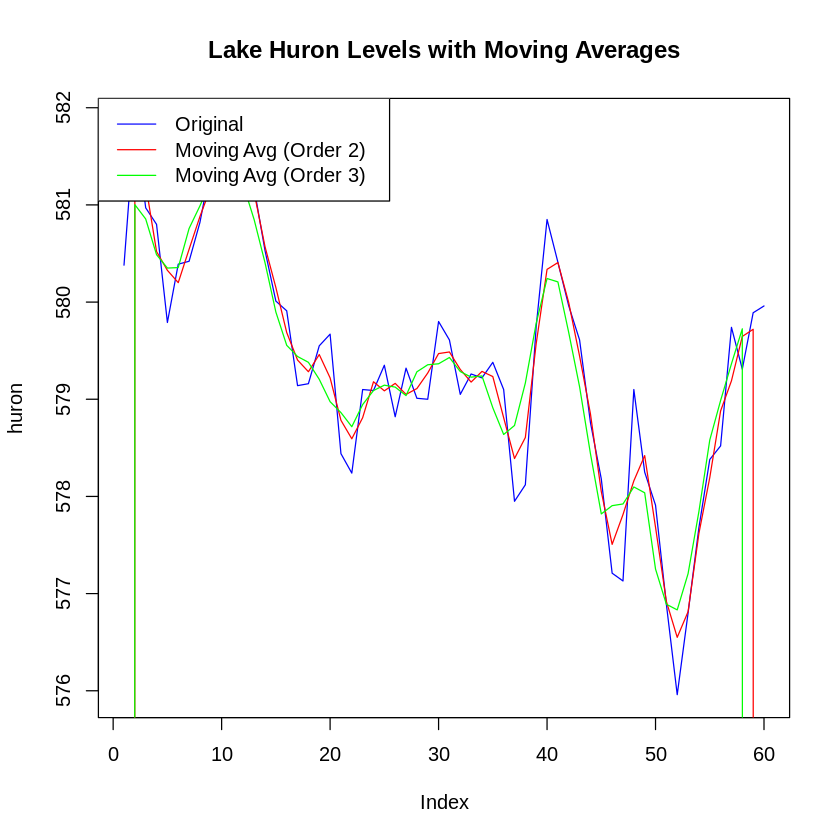

In [69]:

huron <- c(580.38, 581.86, 580.97, 580.80, 579.79, 580.39, 580.42, 580.82, 581.40,
           581.32, 581.44, 581.68, 581.17, 580.53, 580.01, 579.91, 579.14, 579.16,
           579.55, 579.67, 578.44, 578.24, 579.10, 579.09, 579.35, 578.82, 579.32,
           579.01, 579.00, 579.80, 579.61, 579.05, 579.26, 579.22, 579.38, 579.10,
           577.95, 578.12, 579.75, 580.85, 580.41, 579.96, 579.61, 578.76, 578.18,
           577.21, 577.13, 579.10, 578.25, 577.91, 576.89, 575.96, 576.80, 577.68,
           578.38, 578.52, 579.74, 579.31, 579.89, 579.96)
# Function to compute moving average of order 2 for a numeric vector x
moving_average_order2 <- function(x) {
  ma <- numeric(length(x))
  for (i in 2:(length(x) - 1)) {
    ma[i] <- (x[i-1] + x[i] + x[i+1]) / 3
  }
  return(ma)
}

# Function to compute moving average of order 3
moving_average_order3 <- function(x) {
  ma <- numeric(length(x))
  for (i in 2:(length(x) - 2)) {
    ma[i] <- (x[i-1] + x[i] + x[i+1] + x[i+2]) / 4
  }
  return(ma)
}

# Compute moving averages for Lake Huron levels
ma_order2 <- moving_average_order2(huron)
ma_order3 <- moving_average_order3(huron)

# Print or plot the results as needed
# For example, to plot original data and moving averages:
plot(huron, type = 'l', col = 'blue', main = "Lake Huron Levels with Moving Averages")
lines(ma_order2, col = 'red')
lines(ma_order3, col = 'green')
legend("topleft", legend=c("Original", "Moving Avg (Order 2)", "Moving Avg (Order 3)"),
       col=c("blue", "red", "green"), lty=1)

# Optionally, print the first few values for verification
head(data.frame(huron, MA_Order2 = ma_order2, MA_Order3 = ma_order3))


9. Find a way of computing the moving averages in exercise 3 that does not involve the use of a for loop.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




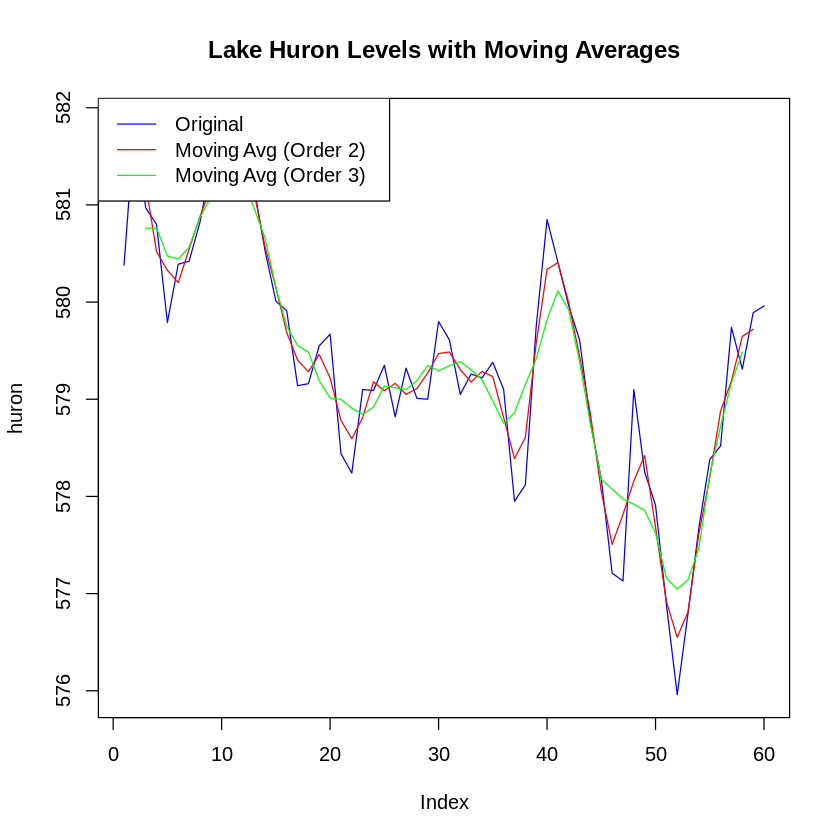

In [72]:
# Assuming 'huron' is a numeric vector
huron <- c(580.38, 581.86, 580.97, 580.80, 579.79, 580.39, 580.42, 580.82, 581.40,
           581.32, 581.44, 581.68, 581.17, 580.53, 580.01, 579.91, 579.14, 579.16,
           579.55, 579.67, 578.44, 578.24, 579.10, 579.09, 579.35, 578.82, 579.32,
           579.01, 579.00, 579.80, 579.61, 579.05, 579.26, 579.22, 579.38, 579.10,
           577.95, 578.12, 579.75, 580.85, 580.41, 579.96, 579.61, 578.76, 578.18,
           577.21, 577.13, 579.10, 578.25, 577.91, 576.89, 575.96, 576.80, 577.68,
           578.38, 578.52, 579.74, 579.31, 579.89, 579.96)
install.packages("zoo")
# Load the zoo package
library(zoo)

# Compute moving average of order 2 using rollapply
ma_order2 <- rollapply(huron, width = 3, FUN = mean, align = "center", fill = NA)

# Compute moving average of order 3 using rollapply
ma_order3 <- rollapply(huron, width = 5, FUN = mean, align = "center", fill = NA)

# Print or plot the results
plot(huron, type = 'l', col = 'blue', main = "Lake Huron Levels with Moving Averages")
lines(ma_order2, col = 'red')
lines(ma_order3, col = 'green')
legend("topleft", legend=c("Original", "Moving Avg (Order 2)", "Moving Avg (Order 3)"),
       col=c("blue", "red", "green"), lty=1)


10. Create a function to compute the average, variance and standard deviation of 1000 randomly generated
uniform random numbers, on [0,1]. (Compare your results with the theoretical results: the expected value of a
uniform random variable on [0,1] is 0.5, and the variance of such a random variable is 0.0833.)

In [73]:
compute_stats <- function() {
  # Generate 1000 uniform random numbers on [0,1]
  random_numbers <- runif(1000)

  # Compute average (mean)
  avg <- mean(random_numbers)

  # Compute variance
  variance <- var(random_numbers)

  # Compute standard deviation
  std_dev <- sd(random_numbers)

  # Print the computed statistics
  cat("Average:", avg, "\n")
  cat("Variance:", variance, "\n")
  cat("Standard Deviation:", std_dev, "\n")

  # Return a list of results
  return(list(mean = avg, var = variance, sd = std_dev))
}

# Call the function to compute statistics
results <- compute_stats()

# Compare with theoretical results
expected_mean <- 0.5
expected_variance <- 1/12  # Variance of uniform [0,1] = (1 - 0)^2 / 12 = 1/12
expected_std_dev <- sqrt(expected_variance)

cat("\nTheoretical Mean:", expected_mean, "\n")
cat("Theoretical Variance:", expected_variance, "\n")
cat("Theoretical Standard Deviation:", expected_std_dev, "\n")


Average: 0.4954422 
Variance: 0.08123415 
Standard Deviation: 0.285016 

Theoretical Mean: 0.5 
Theoretical Variance: 0.08333333 
Theoretical Standard Deviation: 0.2886751 


11. Write a function that generates 100 independent observations on a uniformly distributed random variable on
the interval [3.7, 5.8]. Find the mean, variance and standard deviation of such a uniform random variable. Now
modify the function so that you can specify an arbitrary interval.

In [74]:
# Function to generate and analyze uniform random variables
analyze_uniform <- function(lower, upper, n = 100) {
  # Generate 100 independent observations from a uniform distribution
  random_numbers <- runif(n, min = lower, max = upper)

  # Compute statistics
  mean_val <- mean(random_numbers)
  variance_val <- var(random_numbers)
  sd_val <- sd(random_numbers)

  # Print the computed statistics
  cat("Interval: [", lower, ",", upper, "]\n")
  cat("Mean:", mean_val, "\n")
  cat("Variance:", variance_val, "\n")
  cat("Standard Deviation:", sd_val, "\n\n")

  # Return a list of results
  return(list(mean = mean_val, var = variance_val, sd = sd_val))
}

# Example usage:
# Generate and analyze uniform random variables in the interval [3.7, 5.8]
results1 <- analyze_uniform(3.7, 5.8)

# Modify the function to accept arbitrary intervals
analyze_uniform_arbitrary <- function(interval, n = 100) {
  lower <- interval[1]
  upper <- interval[2]

  # Generate 100 independent observations from a uniform distribution
  random_numbers <- runif(n, min = lower, max = upper)

  # Compute statistics
  mean_val <- mean(random_numbers)
  variance_val <- var(random_numbers)
  sd_val <- sd(random_numbers)

  # Print the computed statistics
  cat("Interval: [", lower, ",", upper, "]\n")
  cat("Mean:", mean_val, "\n")
  cat("Variance:", variance_val, "\n")
  cat("Standard Deviation:", sd_val, "\n\n")

  # Return a list of results
  return(list(mean = mean_val, var = variance_val, sd = sd_val))
}

# Example usage:
# Generate and analyze uniform random variables in the interval [2, 7]
results2 <- analyze_uniform_arbitrary(c(2, 7))


Interval: [ 3.7 , 5.8 ]
Mean: 4.734468 
Variance: 0.3681513 
Standard Deviation: 0.6067547 

Interval: [ 2 , 7 ]
Mean: 4.336347 
Variance: 2.090224 
Standard Deviation: 1.445761 



12. Look up the help for the sample() function. Use it to generate 50 random integers between 0 and 99,
sampled without replacement. (This means that we do not allow any number to be sampled a second time.)
Now, generate 50 random integers between 0 and 9, with replacement.

In [75]:
# Generate 50 random integers between 0 and 99, sampled without replacement
random_integers_without_replacement <- sample(0:99, 50, replace = FALSE)

# Generate 50 random integers between 0 and 9, with replacement
random_integers_with_replacement <- sample(0:9, 50, replace = TRUE)

# Print the results
cat("Random integers between 0 and 99, without replacement:\n")
print(random_integers_without_replacement)

cat("\nRandom integers between 0 and 9, with replacement:\n")
print(random_integers_with_replacement)


Random integers between 0 and 99, without replacement:
 [1] 93 17 49 25 35 95 55 56  2 88 10 50 29 15 89 65 21 16  4 78 61 34 83 62 14
[26] 80 87 33 68 71  1 22 20 18  8 79 45 66 81 44 86 38 39 31 47 75 96 19 74 30

Random integers between 0 and 9, with replacement:
 [1] 7 0 6 8 2 9 5 3 8 4 8 8 4 5 5 5 7 3 7 6 6 4 7 0 6 9 6 4 0 6 6 2 2 8 0 8 6 5
[39] 0 7 4 9 8 4 2 0 5 3 7 8


13. Write an R function that simulates a student guessing at a True-False test consisting of 40 questions. Find
the mean and variance of the student's answers. Compare with the theoretical values of .5 and .25.

In [76]:
simulate_true_false_test <- function(num_questions = 40) {
    # Simulate the student's answers (1 for correct, 0 for incorrect)
    student_answers <- sample(c(0, 1), num_questions, replace = TRUE, prob = c(0.5, 0.5))

    # Calculate mean and variance of the student's answers
    mean_answers <- mean(student_answers)
    var_answers <- var(student_answers)

    # Return mean and variance
    return(list(mean = mean_answers, variance = var_answers))
}

# Call the function to simulate the test
simulation_results <- simulate_true_false_test()

# Print results
cat("Mean of student's answers:", simulation_results$mean, "\n")
cat("Variance of student's answers:", simulation_results$variance, "\n")


Mean of student's answers: 0.525 
Variance of student's answers: 0.2557692 


14. Write an R function that simulates a student guessing at a multiple choice test consisting of 40 questions,
where there is chance of 1 in 5 of getting the right answer to each question. Find the mean and variance of the
student's answers. Compare with the theoretical values of .2 and .16.

In [77]:
simulate_multiple_choice_test <- function(num_questions = 40, probability_correct = 0.2) {
    # Simulate the student's answers (1 for correct, 0 for incorrect)
    student_answers <- sample(c(0, 1), num_questions, replace = TRUE, prob = c(1 - probability_correct, probability_correct))

    # Calculate mean and variance of the student's answers
    mean_answers <- mean(student_answers)
    var_answers <- var(student_answers)

    # Return mean and variance
    return(list(mean = mean_answers, variance = var_answers))
}

# Call the function to simulate the test
simulation_results <- simulate_multiple_choice_test()

# Print results
cat("Mean of student's answers:", simulation_results$mean, "\n")
cat("Variance of student's answers:", simulation_results$variance, "\n")


Mean of student's answers: 0.175 
Variance of student's answers: 0.1480769 


15. Write an R function that simulates the number of working light bulbs out of 500, where each bulb has a
probability .99 of working. Using simulation, estimate the expected value and variance of the random variable
X, which is 1 if the light bulb works and 0 if the light bulb does not work. What are the theoretical values?

In [78]:
simulate_light_bulbs <- function(num_bulbs = 500, probability_working = 0.99) {
    # Simulate the number of working light bulbs
    num_working_bulbs <- rbinom(1, num_bulbs, probability_working)

    # Estimate expected value and variance of the random variable X
    mean_X <- num_working_bulbs / num_bulbs
    var_X <- mean_X * (1 - mean_X)

    # Return mean and variance
    return(list(mean = mean_X, variance = var_X))
}

# Call the function to simulate the light bulbs
simulation_results <- simulate_light_bulbs()

# Print results
cat("Estimated mean of X (number of working bulbs out of 500):", simulation_results$mean, "\n")
cat("Estimated variance of X (number of working bulbs out of 500):", simulation_results$variance, "\n")


Estimated mean of X (number of working bulbs out of 500): 0.99 
Estimated variance of X (number of working bulbs out of 500): 0.0099 


16. Write a function that does an arbitrary number n of repeated simulations of the number of accidents in a
year, plotting the result in a suitable way. Assume that the number of accidents in a year follows a Poisson
distribution. Run the function assuming an average rate of 2.8 accidents per year.

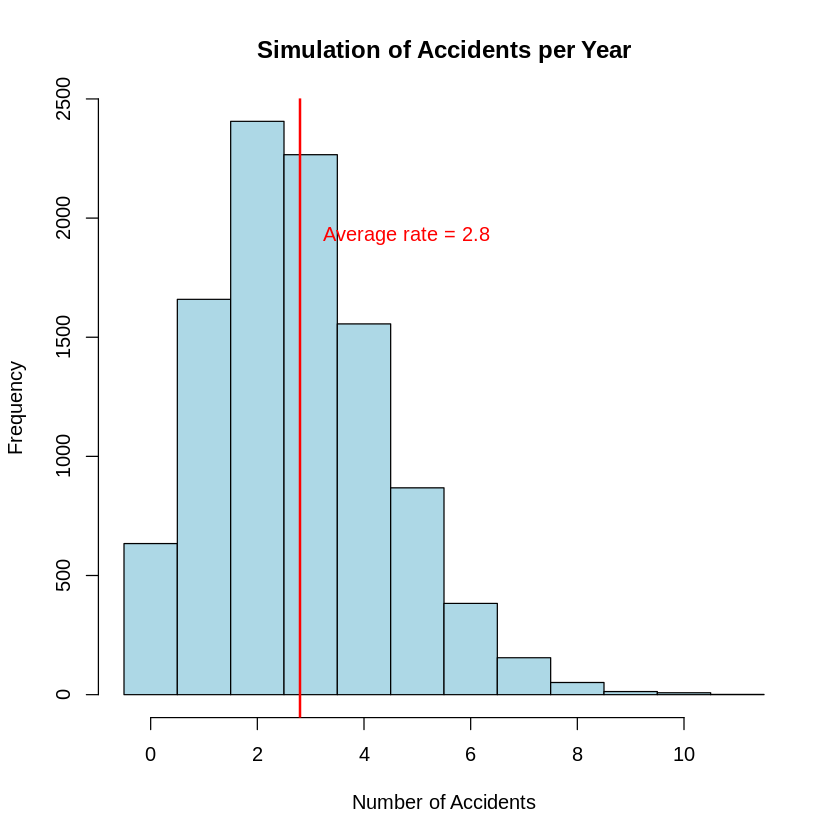

In [79]:
simulate_accidents <- function(n_simulations, average_rate = 2.8) {
    # Simulate accidents for n_simulations
    accidents <- rpois(n_simulations, lambda = average_rate)

    # Plotting the results
    hist(accidents, breaks = seq(min(accidents)-0.5, max(accidents)+0.5, by = 1),
         col = "lightblue", main = "Simulation of Accidents per Year",
         xlab = "Number of Accidents", ylab = "Frequency")

    # Add a vertical line for the average rate
    abline(v = average_rate, col = "red", lwd = 2)

    # Add text for average rate
    text(average_rate + 0.2, max(table(accidents)) * 0.8,
         paste("Average rate =", average_rate), col = "red", pos = 4)
}

# Call the function to simulate accidents and plot the results
simulate_accidents(n_simulations = 10000)


17. Write a function that simulates the repeated calculation of the coefficient of variation (= the ratio of the
mean to the standard deviation), for independent random samples from a normal distribution.

Mean of Coefficients of Variation: 5.066207 
Standard Deviation of Coefficients of Variation: 0.52681 


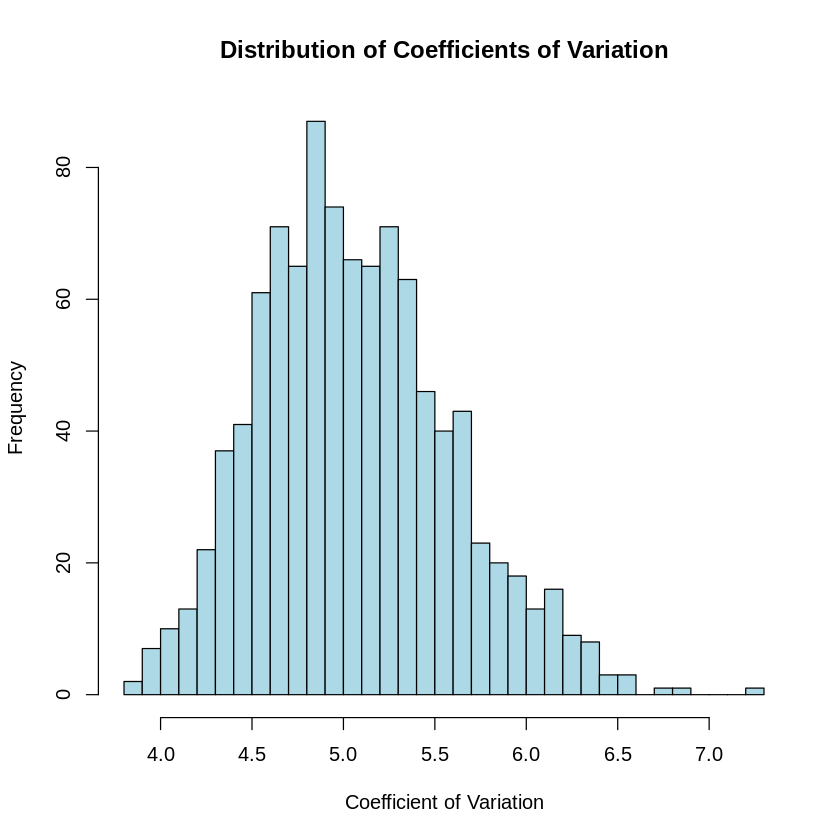

In [80]:
simulate_coefficient_of_variation <- function(n_simulations, sample_size, mean_val, sd_val) {
    # Initialize vector to store coefficient of variations
    coefficients <- numeric(n_simulations)

    # Perform simulations
    for (i in 1:n_simulations) {
        # Generate random sample from normal distribution
        sample_data <- rnorm(sample_size, mean = mean_val, sd = sd_val)

        # Calculate coefficient of variation
        cv <- mean(sample_data) / sd(sample_data)

        # Store coefficient of variation in vector
        coefficients[i] <- cv
    }

    # Return vector of coefficients of variation
    return(coefficients)
}

# Example usage:
set.seed(123)  # Setting seed for reproducibility
n_simulations <- 1000
sample_size <- 50
mean_val <- 10
sd_val <- 2

# Simulate coefficients of variation
coefficients <- simulate_coefficient_of_variation(n_simulations, sample_size, mean_val, sd_val)

# Print mean and standard deviation of coefficients of variation
cat("Mean of Coefficients of Variation:", mean(coefficients), "\n")
cat("Standard Deviation of Coefficients of Variation:", sd(coefficients), "\n")

# Plot histogram of coefficients of variation
hist(coefficients, breaks = 30, col = "lightblue",
     main = "Distribution of Coefficients of Variation",
     xlab = "Coefficient of Variation", ylab = "Frequency")


18. Write a function that, for any sample, calculates the median of the absolute values of the deviations from the
sample median.

In [81]:
calculate_median_abs_deviation <- function(sample_data) {
    # Calculate the sample median
    sample_median <- median(sample_data)

    # Calculate absolute deviations from the sample median
    abs_deviations <- abs(sample_data - sample_median)

    # Calculate the median of absolute deviations
    median_abs_deviation <- median(abs_deviations)

    return(median_abs_deviation)
}

# Example usage:
set.seed(123)  # Setting seed for reproducibility
sample_data <- rnorm(100, mean = 10, sd = 2)

# Calculate median of absolute deviations
result <- calculate_median_abs_deviation(sample_data)

# Print the result
cat("Median of Absolute Deviations:", result, "\n")


Median of Absolute Deviations: 1.200218 


*19. Generate random samples from normal, exponential, t (2 d. f.), and t (1 d. f.), thus:
```
a) xn<-rnorm(100) b) xe<-rexp(100)
c) xt2<-rt(100, df=2) d) xt2<-rt(100, df=1)
```
Apply the function from exercise 17 to each sample. Compare with the standard deviation in each case.

In [82]:
# Function to calculate coefficient of variation
calculate_coefficient_of_variation <- function(sample_data) {
    mean_value <- mean(sample_data)
    sd_value <- sd(sample_data)
    cv <- sd_value / mean_value
    return(cv)
}

# Generate random samples
set.seed(123)  # Setting seed for reproducibility

# a) Normal distribution
xn <- rnorm(100)

# b) Exponential distribution
xe <- rexp(100)

# c) t-distribution with df=2
xt2 <- rt(100, df = 2)

# d) t-distribution with df=1
xt1 <- rt(100, df = 1)

# Calculate coefficient of variation for each sample
cv_xn <- calculate_coefficient_of_variation(xn)
cv_xe <- calculate_coefficient_of_variation(xe)
cv_xt2 <- calculate_coefficient_of_variation(xt2)
cv_xt1 <- calculate_coefficient_of_variation(xt1)

# Print results
cat("Coefficient of Variation (CV) for each distribution:\n")
cat("Normal Distribution (xn):", cv_xn, "\n")
cat("Exponential Distribution (xe):", cv_xe, "\n")
cat("t-distribution (df=2) (xt2):", cv_xt2, "\n")
cat("t-distribution (df=1) (xt1):", cv_xt1, "\n")

# Compare with standard deviation in each case
sd_xn <- sd(xn)
sd_xe <- sd(xe)
sd_xt2 <- sd(xt2)
sd_xt1 <- sd(xt1)

cat("\nStandard Deviation (SD) for each distribution:\n")
cat("Normal Distribution (xn):", sd_xn, "\n")
cat("Exponential Distribution (xe):", sd_xe, "\n")
cat("t-distribution (df=2) (xt2):", sd_xt2, "\n")
cat("t-distribution (df=1) (xt1):", sd_xt1, "\n")


Coefficient of Variation (CV) for each distribution:
Normal Distribution (xn): 10.09686 
Exponential Distribution (xe): 0.8965424 
t-distribution (df=2) (xt2): -51.99879 
t-distribution (df=1) (xt1): -8.78979 

Standard Deviation (SD) for each distribution:
Normal Distribution (xn): 0.9128159 
Exponential Distribution (xe): 0.9353413 
t-distribution (df=2) (xt2): 3.851975 
t-distribution (df=1) (xt1): 7.349763 


*20. The vector x consists of the frequencies
 5, 3, 1, 4, 6
The first element is the number of occurrences of level 1, the second is the number of occurrences of level 2,
and so on. Write a function that takes any such vector x as its input, and outputs the vector of factor levels, here
1 1 1 1 1 2 2 2 3 . . .
[You’ll need the information that is provided by cumsum(x). Form a vector in which 1’s appear whenever the
factor level is incremented, and is otherwise zero. . . .]

In [83]:
generate_factor_levels <- function(x) {
  if (length(x) == 0) {
    stop("Input vector 'x' cannot be empty.")
  }

  cum_freq <- cumsum(x)  # Cumulative sum of frequencies
  n <- sum(x)            # Total number of elements in the output vector

  factor_levels <- rep(0, n)  # Initialize output vector

  # Fill in factor levels based on cumulative frequencies
  for (i in 1:length(x)) {
    start_index <- ifelse(i == 1, 1, cum_freq[i - 1] + 1)
    end_index <- cum_freq[i]
    factor_levels[start_index:end_index] <- i
  }

  return(factor_levels)
}

# Example usage:
x <- c(5, 3, 1, 4, 6)
factor_levels <- generate_factor_levels(x)
factor_levels


[1] 1 1 1 1 1 2 2 2 3 4 4 4 4 5 5 5 5 5 5

*21. Write a function that calculates the minimum of a quadratic, and the value of the function at the minimum.

In [85]:
calculate_quadratic_minimum <- function(a, b, c) {
  # Validate input
  if (length(a) != 1 || length(b) != 1 || length(c) != 1) {
    stop("Input coefficients 'a', 'b', and 'c' must be scalars.")
  }

  # Calculate the minimum x-coordinate
  min_x <- -b / (2 * a)

  # Calculate the value of the quadratic function at the minimum x-coordinate
  min_value <- a * min_x^2 + b * min_x + c

  # Return a list containing both the minimum x-coordinate and the function value
  return(list(min_x = min_x, min_value = min_value))
}

# Example usage:
a <- 1
b <- -2
c <- 1
result <- calculate_quadratic_minimum(a, b, c)
result


$min_x
[1] 1

$min_value
[1] 0

*22. A “between times” correlation matrix, has been calculated from data on heights of trees at times 1, 2, 3, 4, .
. . Write a function that calculates the average of the correlations for any given lag.

In [87]:
calculate_avg_correlation <- function(cor_matrix, lag) {
  # Validate input
  if (!inherits(cor_matrix, "matrix") || nrow(cor_matrix) != ncol(cor_matrix)) {
    stop("Input 'cor_matrix' must be a square matrix.")
  }

  # Check if lag is within bounds
  if (lag < 1 || lag >= nrow(cor_matrix)) {
    stop("Lag must be a positive integer less than the number of rows/columns in 'cor_matrix'.")
  }

  # Extract correlations for the given lag
  indices <- seq_len(nrow(cor_matrix) - lag)
  correlations <- cor_matrix[cbind(indices, indices + lag)]

  # Calculate average correlation
  avg_correlation <- mean(correlations, na.rm = TRUE)

  return(avg_correlation)
}

# Example usage:
# Assume cor_matrix is your between times correlation matrix
# Here's a sample matrix (replace with your actual data):
cor_matrix <- matrix(c(1.00, 0.85, 0.70, 0.60,
                       0.85, 1.00, 0.75, 0.65,
                       0.70, 0.75, 1.00, 0.80,
                       0.60, 0.65, 0.80, 1.00), nrow = 4, byrow = TRUE)

# Calculate average correlation with lag 1
lag <- 1
avg_correlation <- calculate_avg_correlation(cor_matrix, lag)
avg_correlation


[1] 0.8

*23. Given data on trees at times 1, 2, 3, 4, . . ., write a function that calculates the matrix of “average” relative
growth rates over the several intervals.
[The relative growth rate may be defined as

$1/wdw/dt = dlogw/dt$ .

Hence it is reasonable to calculate the average
over the interval from t1 to t2 as
$(log w_2 - log w_1)/(t_2 - t_1)$ .]

In [88]:
calculate_avg_growth_rates <- function(tree_data) {
  # Check if tree_data is a data frame or matrix
  if (!is.data.frame(tree_data) && !is.matrix(tree_data)) {
    stop("Input 'tree_data' must be a data frame or matrix.")
  }

  # Calculate number of intervals
  num_intervals <- ncol(tree_data) - 1

  # Initialize matrix to store average growth rates
  avg_growth_rates <- matrix(NA, nrow = num_intervals, ncol = ncol(tree_data))

  # Calculate growth rates for each interval
  for (i in 1:num_intervals) {
    avg_growth_rates[i, ] <- log(tree_data[, i + 1]) - log(tree_data[, i])
  }

  # Divide by time interval lengths
  time_intervals <- 1:num_intervals
  for (i in time_intervals) {
    avg_growth_rates[i, ] <- avg_growth_rates[i, ] / (time_intervals[i + 1] - time_intervals[i])
  }

  # Return the matrix of average growth rates
  return(avg_growth_rates)
}

# Example usage:
# Assume tree_data is your data on trees at times 1, 2, 3, 4, ...
# Here's a sample dataset (replace with your actual data):
tree_data <- data.frame(Time1 = c(10, 12, 15, 18),
                        Time2 = c(12, 14, 16, 20),
                        Time3 = c(13, 15, 17, 21),
                        Time4 = c(15, 17, 18, 22))

# Calculate average growth rates
avg_growth_rates <- calculate_avg_growth_rates(tree_data)
avg_growth_rates


0.18232156,0.15415068,0.06453852,0.10536052
0.08004271,0.06899287,0.06062462,0.04879016
NA,NA,NA,NA
